# P1 - Identificando personas desde una imagen de su cara

### MODELO 4 - SVM SUPPORT VECTOR MACHINE


Elaborado por GRUPO 1:

- Juanita Piraban Barbosa - 201216313
- Lorena Morales Rodríguez - 202027957
- Alejandro Barinas Guio - 201628859
- Jaime Humberto Trujillo Perea - 201920366
- Alexander Zapata Galindo - 201425426

In [1]:
# Librarías
from sklearn.datasets import fetch_lfw_people
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from keras import models
from keras import layers
from keras import preprocessing
from keras import backend as K
from livelossplot import PlotLossesKeras

import matplotlib.pyplot as plt
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import scikitplot as skplt

from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_lfw_pairs
from sklearn import svm

from PIL import Image
import random

import tensorflow as tf
import tensorflow_datasets as tfds
tf.test.gpu_device_name()

import warnings
warnings.filterwarnings('ignore')

In [2]:
# DataSet : “Labeled Faces in the Wild”
# número mínimo de fotos por personaje para filtrar la base

# con 10 mín  fotos se generan 158 categorías
# con 20 mín  fotos se generan 62 categorías (sugerido profesor)
# con 30 mín  fotos se generan 12 categorías
# con 40 mín  fotos se generan 19 categorías (sugerido paper Alejo)
# con 50 mín  fotos se generan 12 categorías
# con 60 mín  fotos se generan 8 categorías
# con 70 mín  fotos se generan 7 categorías (más común según paper Alejo)

In [3]:
# DataSet : “Labeled Faces in the Wild”
min_faces_per_person = 60 # número mínimo de fotos por personaje para filtrar la base
resize=0.5 # Número de define la calidad de las imágenes

In [4]:
# Some definitions

data = fetch_lfw_people(min_faces_per_person=min_faces_per_person, resize=resize)

l=list(data.keys())
X=data[l[0]]
y=data[l[2]]
target_names=data[l[3]]

_,W,H=data[l[1]].shape
features=X.shape[1]
m=X.shape[0]
classes=data[l[3]].shape[0]

print("Resumen Imágenes a procesar")
print("Samples:",m)
print("Classes:",classes)
print("Dimentions:",(W,H))

Resumen Imágenes a procesar
Samples: 1348
Classes: 8
Dimentions: (62, 47)


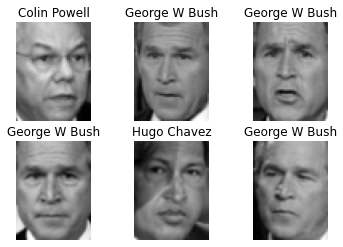

In [5]:
# Some examples
for i in range(6):
  img=X[i,:]
  img=img.reshape(W,H)
  plt.subplot(2,3,i+1)
  plt.title(target_names[y[i]])
  plt.imshow(img,cmap='gray')
  plt.axis('off')
plt.show()

# A. min_faces_per_person = 20 / resize=0.5

In [6]:
# DataSet : “Labeled Faces in the Wild”
min_faces_per_person = 20 # número mínimo de fotos por personaje para filtrar la base
resize=0.5 # Número de define la calidad de las imágenes


In [7]:
# Some definitions

data = fetch_lfw_people(min_faces_per_person=min_faces_per_person, resize=resize)

l=list(data.keys())
X=data[l[0]]
y=data[l[2]]
target_names=data[l[3]]

_,W,H=data[l[1]].shape
features=X.shape[1]
m=X.shape[0]
classes=data[l[3]].shape[0]

print("Resumen Imágenes a procesar")
print("Samples:",m)
print("Classes:",classes)
print("Dimentions:",(W,H))

Resumen Imágenes a procesar
Samples: 3023
Classes: 62
Dimentions: (62, 47)


In [12]:
# Shuffling the data

temp=list(zip(X,y)) 
random.shuffle(temp) 
X,y=zip(*temp)

X=np.array(X)
y=np.array(y)

# Train and test splitting of data
training_data_X,testing_data_X,training_data_Y,testing_data_Y=train_test_split(X,y,test_size=0.20,random_state=42)

In [9]:
# Linear SVM
svm_linear=svm.SVC(kernel='linear',probability=True)
svm_linear=svm_linear.fit(training_data_X,training_data_Y)
print("Linear SVM")
print(svm_linear.score(testing_data_X,testing_data_Y)*100)

# RBF SVM
svm_rbf=svm.SVC(kernel='rbf',gamma='scale',C=10,probability=True)
svm_rbf=svm_rbf.fit(training_data_X,training_data_Y)
print("RBF SVM")
print(svm_rbf.score(testing_data_X,testing_data_Y)*100)

# Quadratic SVM
svm_quad=svm.SVC(kernel='poly',degree=2,gamma='scale',probability=True)
svm_quad=svm_quad.fit(training_data_X,training_data_Y)
print("Quadratic SVM")
print(svm_quad.score(testing_data_X,testing_data_Y)*100)

Linear SVM
62.64462809917355
RBF SVM
60.49586776859505
Quadratic SVM
62.14876033057851


In [10]:
# Classification Report

print("Linear SVM")
y_pred=svm_linear.predict(testing_data_X)
print(classification_report(testing_data_Y,y_pred,target_names=target_names))

print("RBF SVM")
y_pred=svm_rbf.predict(testing_data_X)
print(classification_report(testing_data_Y,y_pred,target_names=target_names))

print("Quadratic SVM")
y_pred=svm_quad.predict(testing_data_X)
print(classification_report(testing_data_Y,y_pred,target_names=target_names))

Linear SVM
                           precision    recall  f1-score   support

         Alejandro Toledo       0.50      0.12      0.20         8
             Alvaro Uribe       1.00      0.90      0.95        10
          Amelie Mauresmo       0.67      1.00      0.80         2
             Andre Agassi       0.25      0.25      0.25         4
           Angelina Jolie       0.25      0.50      0.33         2
             Ariel Sharon       0.59      0.77      0.67        26
    Arnold Schwarzenegger       0.50      0.29      0.36         7
     Atal Bihari Vajpayee       0.60      0.33      0.43         9
             Bill Clinton       0.27      0.50      0.35         6
             Carlos Menem       0.29      0.67      0.40         3
             Colin Powell       0.81      0.81      0.81        47
            David Beckham       0.17      0.20      0.18         5
          Donald Rumsfeld       0.79      0.72      0.75        32
         George Robertson       0.75      0.60    

                           precision    recall  f1-score   support

         Alejandro Toledo       0.67      0.25      0.36         8
             Alvaro Uribe       1.00      0.90      0.95        10
          Amelie Mauresmo       1.00      0.50      0.67         2
             Andre Agassi       0.25      0.25      0.25         4
           Angelina Jolie       0.25      0.50      0.33         2
             Ariel Sharon       0.63      0.85      0.72        26
    Arnold Schwarzenegger       0.43      0.43      0.43         7
     Atal Bihari Vajpayee       0.60      0.33      0.43         9
             Bill Clinton       0.30      0.50      0.37         6
             Carlos Menem       0.25      0.67      0.36         3
             Colin Powell       0.79      0.81      0.80        47
            David Beckham       0.20      0.20      0.20         5
          Donald Rumsfeld       0.74      0.72      0.73        32
         George Robertson       0.75      0.60      0.67     

Linear SVM


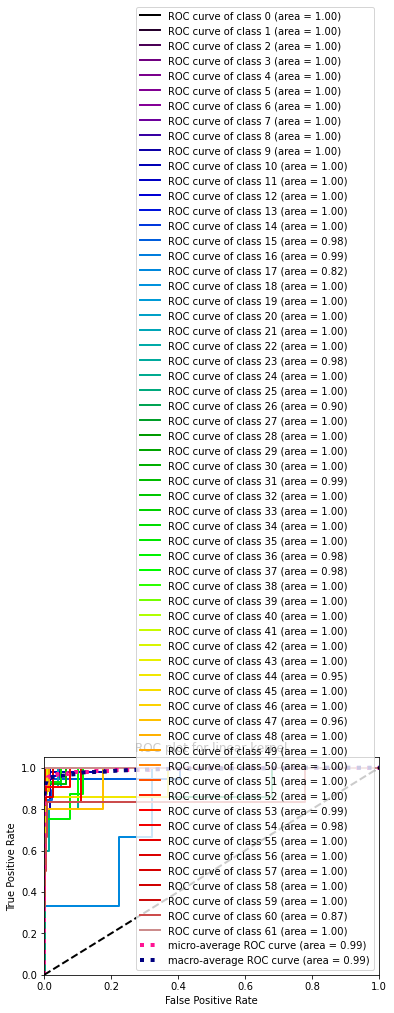

RBF SVM


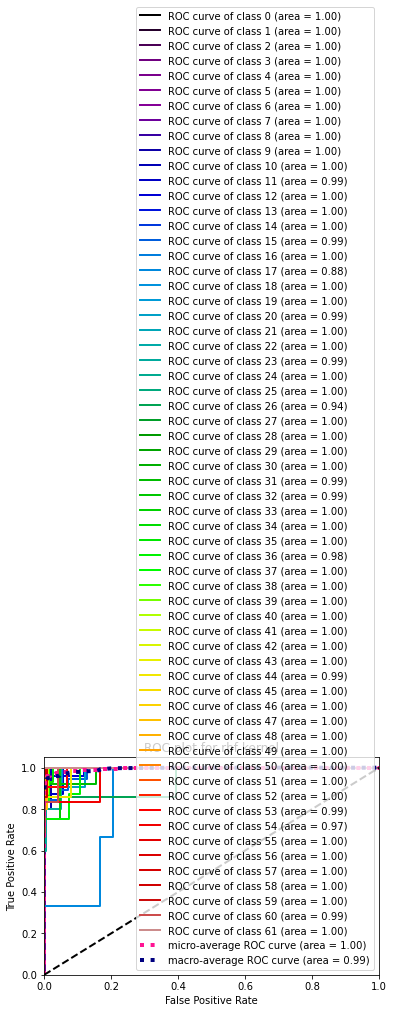

Quadratic SVM


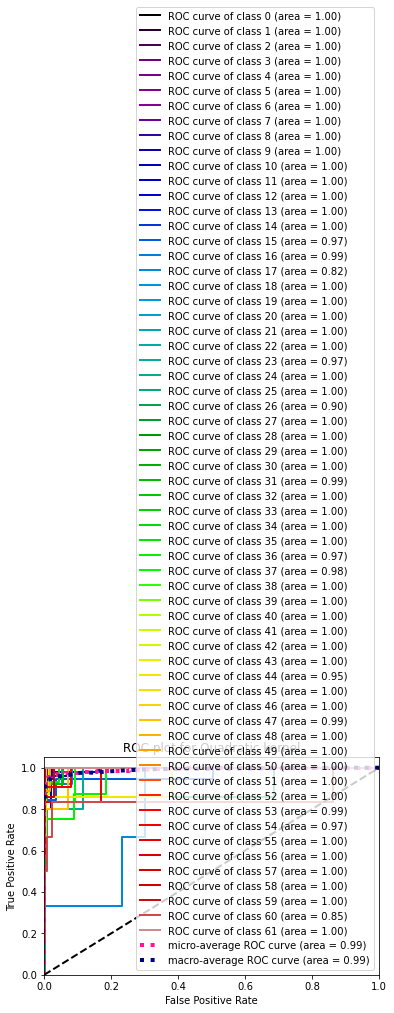

In [13]:
# ROC Curve

#!pip install scikit-plot
import matplotlib.pyplot as plt
import scikitplot as skplt

predict_l=svm_linear.predict_proba(testing_data_X)
predict_rbf=svm_rbf.predict_proba(testing_data_X)
predict_q=svm_quad.predict_proba(testing_data_X)

print("Linear SVM")
skplt.metrics.plot_roc(testing_data_Y,predict_l,title="ROC plot for linear kernel")
#plt.savefig('/content/drive/My Drive/Jupyter/linear.png')
#plt.legend('')
plt.show()

print("RBF SVM")
skplt.metrics.plot_roc(testing_data_Y,predict_rbf,title="ROC plot for rbf kernel")
#plt.savefig('/content/drive/My Drive/Jupyter/rbf.png')
#plt.legend('')
plt.show()

print("Quadratic SVM")
skplt.metrics.plot_roc(testing_data_Y,predict_q,title="ROC plot for Quadratic kernel")
#plt.savefig('/content/drive/My Drive/Jupyter/quadratic.png')
#plt.legend('')
plt.show()

# B. min_faces_per_person = 20 / resize=0.7

In [14]:
# DataSet : “Labeled Faces in the Wild”
min_faces_per_person = 20 # número mínimo de fotos por personaje para filtrar la base
resize=0.7 # Número de define la calidad de las imágenes


In [15]:
# Some definitions

data = fetch_lfw_people(min_faces_per_person=min_faces_per_person, resize=resize)

l=list(data.keys())
X=data[l[0]]
y=data[l[2]]
target_names=data[l[3]]

_,W,H=data[l[1]].shape
features=X.shape[1]
m=X.shape[0]
classes=data[l[3]].shape[0]

print("Resumen Imágenes a procesar")
print("Samples:",m)
print("Classes:",classes)
print("Dimentions:",(W,H))

Resumen Imágenes a procesar
Samples: 3023
Classes: 62
Dimentions: (87, 65)


In [16]:
# Shuffling the data

temp=list(zip(X,y)) 
random.shuffle(temp) 
X,y=zip(*temp)

X=np.array(X)
y=np.array(y)

# Train and test splitting of data
training_data_X,testing_data_X,training_data_Y,testing_data_Y=train_test_split(X,y,test_size=0.20,random_state=42)

In [ ]:
# Linear SVM
svm_linear=svm.SVC(kernel='linear',probability=True)
svm_linear=svm_linear.fit(training_data_X,training_data_Y)
print("Linear SVM")
print(svm_linear.score(testing_data_X,testing_data_Y)*100)

# RBF SVM
svm_rbf=svm.SVC(kernel='rbf',gamma='scale',C=10,probability=True)
svm_rbf=svm_rbf.fit(training_data_X,training_data_Y)
print("RBF SVM")
print(svm_rbf.score(testing_data_X,testing_data_Y)*100)

# Quadratic SVM
svm_quad=svm.SVC(kernel='poly',degree=2,gamma='scale',probability=True)
svm_quad=svm_quad.fit(training_data_X,training_data_Y)
print("Quadratic SVM")
print(svm_quad.score(testing_data_X,testing_data_Y)*100)

In [ ]:
# Classification Report

print("Linear SVM")
y_pred=svm_linear.predict(testing_data_X)
print(classification_report(testing_data_Y,y_pred,target_names=target_names))

print("RBF SVM")
y_pred=svm_rbf.predict(testing_data_X)
print(classification_report(testing_data_Y,y_pred,target_names=target_names))

print("Quadratic SVM")
y_pred=svm_quad.predict(testing_data_X)
print(classification_report(testing_data_Y,y_pred,target_names=target_names))

In [ ]:
# ROC Curve

#!pip install scikit-plot
import matplotlib.pyplot as plt
import scikitplot as skplt

predict_l=svm_linear.predict_proba(testing_data_X)
predict_rbf=svm_rbf.predict_proba(testing_data_X)
predict_q=svm_quad.predict_proba(testing_data_X)

print("Linear SVM")
skplt.metrics.plot_roc(testing_data_Y,predict_l,title="ROC plot for linear kernel")
#plt.savefig('/content/drive/My Drive/Jupyter/linear.png')
#plt.legend('')
plt.show()

print("RBF SVM")
skplt.metrics.plot_roc(testing_data_Y,predict_rbf,title="ROC plot for rbf kernel")
#plt.savefig('/content/drive/My Drive/Jupyter/rbf.png')
#plt.legend('')
plt.show()

print("Quadratic SVM")
skplt.metrics.plot_roc(testing_data_Y,predict_q,title="ROC plot for Quadratic kernel")
#plt.savefig('/content/drive/My Drive/Jupyter/quadratic.png')
#plt.legend('')
plt.show()

# C. min_faces_per_person = 40 / resize=0.5

In [ ]:
# DataSet : “Labeled Faces in the Wild”
min_faces_per_person = 40 # número mínimo de fotos por personaje para filtrar la base
resize=0.5 # Número de define la calidad de las imágenes


In [ ]:
# Some definitions

data = fetch_lfw_people(min_faces_per_person=min_faces_per_person, resize=resize)

l=list(data.keys())
X=data[l[0]]
y=data[l[2]]
target_names=data[l[3]]

_,W,H=data[l[1]].shape
features=X.shape[1]
m=X.shape[0]
classes=data[l[3]].shape[0]

print("Resumen Imágenes a procesar")
print("Samples:",m)
print("Classes:",classes)
print("Dimentions:",(W,H))

In [ ]:
# Shuffling the data

temp=list(zip(X,y)) 
random.shuffle(temp) 
X,y=zip(*temp)

X=np.array(X)
y=np.array(y)

# Train and test splitting of data
training_data_X,testing_data_X,training_data_Y,testing_data_Y=train_test_split(X,y,test_size=0.20,random_state=42)

In [ ]:
# Linear SVM
svm_linear=svm.SVC(kernel='linear',probability=True)
svm_linear=svm_linear.fit(training_data_X,training_data_Y)
print("Linear SVM")
print(svm_linear.score(testing_data_X,testing_data_Y)*100)

# RBF SVM
svm_rbf=svm.SVC(kernel='rbf',gamma='scale',C=10,probability=True)
svm_rbf=svm_rbf.fit(training_data_X,training_data_Y)
print("RBF SVM")
print(svm_rbf.score(testing_data_X,testing_data_Y)*100)

# Quadratic SVM
svm_quad=svm.SVC(kernel='poly',degree=2,gamma='scale',probability=True)
svm_quad=svm_quad.fit(training_data_X,training_data_Y)
print("Quadratic SVM")
print(svm_quad.score(testing_data_X,testing_data_Y)*100)

In [ ]:
# Classification Report

print("Linear SVM")
y_pred=svm_linear.predict(testing_data_X)
print(classification_report(testing_data_Y,y_pred,target_names=target_names))

print("RBF SVM")
y_pred=svm_rbf.predict(testing_data_X)
print(classification_report(testing_data_Y,y_pred,target_names=target_names))

print("Quadratic SVM")
y_pred=svm_quad.predict(testing_data_X)
print(classification_report(testing_data_Y,y_pred,target_names=target_names))

In [ ]:
# ROC Curve

#!pip install scikit-plot
import matplotlib.pyplot as plt
import scikitplot as skplt

predict_l=svm_linear.predict_proba(testing_data_X)
predict_rbf=svm_rbf.predict_proba(testing_data_X)
predict_q=svm_quad.predict_proba(testing_data_X)

print("Linear SVM")
skplt.metrics.plot_roc(testing_data_Y,predict_l,title="ROC plot for linear kernel")
#plt.savefig('/content/drive/My Drive/Jupyter/linear.png')
#plt.legend('')
plt.show()

print("RBF SVM")
skplt.metrics.plot_roc(testing_data_Y,predict_rbf,title="ROC plot for rbf kernel")
#plt.savefig('/content/drive/My Drive/Jupyter/rbf.png')
#plt.legend('')
plt.show()

print("Quadratic SVM")
skplt.metrics.plot_roc(testing_data_Y,predict_q,title="ROC plot for Quadratic kernel")
#plt.savefig('/content/drive/My Drive/Jupyter/quadratic.png')
#plt.legend('')
plt.show()

# D. min_faces_per_person = 40 / resize=0.7

In [ ]:
# DataSet : “Labeled Faces in the Wild”
min_faces_per_person = 40 # número mínimo de fotos por personaje para filtrar la base
resize=0.7 # Número de define la calidad de las imágenes


In [ ]:
# Some definitions

data = fetch_lfw_people(min_faces_per_person=min_faces_per_person, resize=resize)

l=list(data.keys())
X=data[l[0]]
y=data[l[2]]
target_names=data[l[3]]

_,W,H=data[l[1]].shape
features=X.shape[1]
m=X.shape[0]
classes=data[l[3]].shape[0]

print("Resumen Imágenes a procesar")
print("Samples:",m)
print("Classes:",classes)
print("Dimentions:",(W,H))

In [ ]:
# Shuffling the data

temp=list(zip(X,y)) 
random.shuffle(temp) 
X,y=zip(*temp)

X=np.array(X)
y=np.array(y)

# Train and test splitting of data
training_data_X,testing_data_X,training_data_Y,testing_data_Y=train_test_split(X,y,test_size=0.20,random_state=42)

In [ ]:
# Linear SVM
svm_linear=svm.SVC(kernel='linear',probability=True)
svm_linear=svm_linear.fit(training_data_X,training_data_Y)
print("Linear SVM")
print(svm_linear.score(testing_data_X,testing_data_Y)*100)

# RBF SVM
svm_rbf=svm.SVC(kernel='rbf',gamma='scale',C=10,probability=True)
svm_rbf=svm_rbf.fit(training_data_X,training_data_Y)
print("RBF SVM")
print(svm_rbf.score(testing_data_X,testing_data_Y)*100)

# Quadratic SVM
svm_quad=svm.SVC(kernel='poly',degree=2,gamma='scale',probability=True)
svm_quad=svm_quad.fit(training_data_X,training_data_Y)
print("Quadratic SVM")
print(svm_quad.score(testing_data_X,testing_data_Y)*100)

In [ ]:
# Classification Report

print("Linear SVM")
y_pred=svm_linear.predict(testing_data_X)
print(classification_report(testing_data_Y,y_pred,target_names=target_names))

print("RBF SVM")
y_pred=svm_rbf.predict(testing_data_X)
print(classification_report(testing_data_Y,y_pred,target_names=target_names))

print("Quadratic SVM")
y_pred=svm_quad.predict(testing_data_X)
print(classification_report(testing_data_Y,y_pred,target_names=target_names))

In [ ]:
# ROC Curve

#!pip install scikit-plot
import matplotlib.pyplot as plt
import scikitplot as skplt

predict_l=svm_linear.predict_proba(testing_data_X)
predict_rbf=svm_rbf.predict_proba(testing_data_X)
predict_q=svm_quad.predict_proba(testing_data_X)

print("Linear SVM")
skplt.metrics.plot_roc(testing_data_Y,predict_l,title="ROC plot for linear kernel")
#plt.savefig('/content/drive/My Drive/Jupyter/linear.png')
#plt.legend('')
plt.show()

print("RBF SVM")
skplt.metrics.plot_roc(testing_data_Y,predict_rbf,title="ROC plot for rbf kernel")
#plt.savefig('/content/drive/My Drive/Jupyter/rbf.png')
#plt.legend('')
plt.show()

print("Quadratic SVM")
skplt.metrics.plot_roc(testing_data_Y,predict_q,title="ROC plot for Quadratic kernel")
#plt.savefig('/content/drive/My Drive/Jupyter/quadratic.png')
#plt.legend('')
plt.show()

# E. min_faces_per_person = 60 / resize=0.5

In [ ]:
# DataSet : “Labeled Faces in the Wild”
min_faces_per_person = 60 # número mínimo de fotos por personaje para filtrar la base
resize=0.5 # Número de define la calidad de las imágenes


In [ ]:
# Some definitions

data = fetch_lfw_people(min_faces_per_person=min_faces_per_person, resize=resize)

l=list(data.keys())
X=data[l[0]]
y=data[l[2]]
target_names=data[l[3]]

_,W,H=data[l[1]].shape
features=X.shape[1]
m=X.shape[0]
classes=data[l[3]].shape[0]

print("Resumen Imágenes a procesar")
print("Samples:",m)
print("Classes:",classes)
print("Dimentions:",(W,H))

In [ ]:
# Shuffling the data

temp=list(zip(X,y)) 
random.shuffle(temp) 
X,y=zip(*temp)

X=np.array(X)
y=np.array(y)

# Train and test splitting of data
training_data_X,testing_data_X,training_data_Y,testing_data_Y=train_test_split(X,y,test_size=0.20,random_state=42)

In [ ]:
# Linear SVM
svm_linear=svm.SVC(kernel='linear',probability=True)
svm_linear=svm_linear.fit(training_data_X,training_data_Y)
print("Linear SVM")
print(svm_linear.score(testing_data_X,testing_data_Y)*100)

# RBF SVM
svm_rbf=svm.SVC(kernel='rbf',gamma='scale',C=10,probability=True)
svm_rbf=svm_rbf.fit(training_data_X,training_data_Y)
print("RBF SVM")
print(svm_rbf.score(testing_data_X,testing_data_Y)*100)

# Quadratic SVM
svm_quad=svm.SVC(kernel='poly',degree=2,gamma='scale',probability=True)
svm_quad=svm_quad.fit(training_data_X,training_data_Y)
print("Quadratic SVM")
print(svm_quad.score(testing_data_X,testing_data_Y)*100)

In [ ]:
# Classification Report

print("Linear SVM")
y_pred=svm_linear.predict(testing_data_X)
print(classification_report(testing_data_Y,y_pred,target_names=target_names))

print("RBF SVM")
y_pred=svm_rbf.predict(testing_data_X)
print(classification_report(testing_data_Y,y_pred,target_names=target_names))

print("Quadratic SVM")
y_pred=svm_quad.predict(testing_data_X)
print(classification_report(testing_data_Y,y_pred,target_names=target_names))

In [ ]:
# ROC Curve

#!pip install scikit-plot
import matplotlib.pyplot as plt
import scikitplot as skplt

predict_l=svm_linear.predict_proba(testing_data_X)
predict_rbf=svm_rbf.predict_proba(testing_data_X)
predict_q=svm_quad.predict_proba(testing_data_X)

print("Linear SVM")
skplt.metrics.plot_roc(testing_data_Y,predict_l,title="ROC plot for linear kernel")
#plt.savefig('/content/drive/My Drive/Jupyter/linear.png')
#plt.legend('')
plt.show()

print("RBF SVM")
skplt.metrics.plot_roc(testing_data_Y,predict_rbf,title="ROC plot for rbf kernel")
#plt.savefig('/content/drive/My Drive/Jupyter/rbf.png')
#plt.legend('')
plt.show()

print("Quadratic SVM")
skplt.metrics.plot_roc(testing_data_Y,predict_q,title="ROC plot for Quadratic kernel")
#plt.savefig('/content/drive/My Drive/Jupyter/quadratic.png')
#plt.legend('')
plt.show()

# F. min_faces_per_person = 60 / resize=0.7

In [ ]:
# DataSet : “Labeled Faces in the Wild”
min_faces_per_person = 60 # número mínimo de fotos por personaje para filtrar la base
resize=0.7 # Número de define la calidad de las imágenes


In [ ]:
# Some definitions

data = fetch_lfw_people(min_faces_per_person=min_faces_per_person, resize=resize)

l=list(data.keys())
X=data[l[0]]
y=data[l[2]]
target_names=data[l[3]]

_,W,H=data[l[1]].shape
features=X.shape[1]
m=X.shape[0]
classes=data[l[3]].shape[0]

print("Resumen Imágenes a procesar")
print("Samples:",m)
print("Classes:",classes)
print("Dimentions:",(W,H))

In [ ]:
# Shuffling the data

temp=list(zip(X,y)) 
random.shuffle(temp) 
X,y=zip(*temp)

X=np.array(X)
y=np.array(y)

# Train and test splitting of data
training_data_X,testing_data_X,training_data_Y,testing_data_Y=train_test_split(X,y,test_size=0.20,random_state=42)

In [ ]:
# Linear SVM
svm_linear=svm.SVC(kernel='linear',probability=True)
svm_linear=svm_linear.fit(training_data_X,training_data_Y)
print("Linear SVM")
print(svm_linear.score(testing_data_X,testing_data_Y)*100)

# RBF SVM
svm_rbf=svm.SVC(kernel='rbf',gamma='scale',C=10,probability=True)
svm_rbf=svm_rbf.fit(training_data_X,training_data_Y)
print("RBF SVM")
print(svm_rbf.score(testing_data_X,testing_data_Y)*100)

# Quadratic SVM
svm_quad=svm.SVC(kernel='poly',degree=2,gamma='scale',probability=True)
svm_quad=svm_quad.fit(training_data_X,training_data_Y)
print("Quadratic SVM")
print(svm_quad.score(testing_data_X,testing_data_Y)*100)

In [ ]:
# Classification Report

print("Linear SVM")
y_pred=svm_linear.predict(testing_data_X)
print(classification_report(testing_data_Y,y_pred,target_names=target_names))

print("RBF SVM")
y_pred=svm_rbf.predict(testing_data_X)
print(classification_report(testing_data_Y,y_pred,target_names=target_names))

print("Quadratic SVM")
y_pred=svm_quad.predict(testing_data_X)
print(classification_report(testing_data_Y,y_pred,target_names=target_names))

In [ ]:
# ROC Curve

#!pip install scikit-plot
import matplotlib.pyplot as plt
import scikitplot as skplt

predict_l=svm_linear.predict_proba(testing_data_X)
predict_rbf=svm_rbf.predict_proba(testing_data_X)
predict_q=svm_quad.predict_proba(testing_data_X)

print("Linear SVM")
skplt.metrics.plot_roc(testing_data_Y,predict_l,title="ROC plot for linear kernel")
#plt.savefig('/content/drive/My Drive/Jupyter/linear.png')
#plt.legend('')
plt.show()

print("RBF SVM")
skplt.metrics.plot_roc(testing_data_Y,predict_rbf,title="ROC plot for rbf kernel")
#plt.savefig('/content/drive/My Drive/Jupyter/rbf.png')
#plt.legend('')
plt.show()

print("Quadratic SVM")
skplt.metrics.plot_roc(testing_data_Y,predict_q,title="ROC plot for Quadratic kernel")
#plt.savefig('/content/drive/My Drive/Jupyter/quadratic.png')
#plt.legend('')
plt.show()

# Selected:
# min_faces_per_person = 60 / resize=0.5

In [ ]:
# DataSet : “Labeled Faces in the Wild”
min_faces_per_person = 60 # número mínimo de fotos por personaje para filtrar la base
resize=0.5 # Número de define la calidad de las imágenes

In [ ]:
# Some definitions

data = fetch_lfw_people(min_faces_per_person=min_faces_per_person, resize=resize)

l=list(data.keys())
X=data[l[0]]
y=data[l[2]]
target_names=data[l[3]]

_,W,H=data[l[1]].shape
features=X.shape[1]
m=X.shape[0]
classes=data[l[3]].shape[0]

print("Resumen Imágenes a procesar")
print("Samples:",m)
print("Classes:",classes)
print("Dimentions:",(W,H))

In [ ]:
# Shuffling the data

temp=list(zip(X,y)) 
random.shuffle(temp) 
X,y=zip(*temp)

X=np.array(X)
y=np.array(y)

# Train and test splitting of data
training_data_X,testing_data_X,training_data_Y,testing_data_Y=train_test_split(X,y,test_size=0.20,random_state=42)

# Without PCA

In [ ]:
# Tunning - Linear SVM
param_grid ={'C':[1e3,5e3,1e4,5e4,1e5],'gamma':[0.0001,0.0005,0.001,0.005,0.01,0.1],}
clf=GridSearchCV(SVC(kernel='linear',class_weight='balanced'),param_grid)
clf=clf.fit(train_img,training_data_Y)
print("Best estimator found by grid search:")
print(clf.best_estimator_)

# Best Linear SVM
svm_linear=svm.SVC(kernel='linear',probability=True, gamma=clf.best_params_['gamma'],C=clf.best_params_['C'])
svm_linear=svm_linear.fit(train_img,training_data_Y)
print("Linear SVM")
print("Accuracy = " + svm_linear.score(test_img,testing_data_Y)*100)


In [ ]:
# Tunning - RBF SVM
param_grid ={'C':[1e3,5e3,1e4,5e4,1e5],'gamma':[0.0001,0.0005,0.001,0.005,0.01,0.1],}
clf=GridSearchCV(SVC(kernel='rbf',class_weight='balanced',probability=True),param_grid)
clf=clf.fit(train_img,training_data_Y)
print("Best estimator found by grid search:")
print(clf.best_estimator_)

# Best RBF SVM
svm_rbf=svm.SVC(kernel='rbf',probability=True, class_weight='balanced', gamma=clf.best_params_['gamma'],C=clf.best_params_['C'])
svm_rbf=svm_rbf.fit(train_img,training_data_Y)
print("RBF SVM")
print("Accuracy = " + svm_rbf.score(test_img,testing_data_Y)*100)

In [ ]:
# Tunning - Quadratic SVM
param_grid ={'C':[1e3,5e3,1e4,5e4,1e5],'gamma':[0.0001,0.0005,0.001,0.005,0.01,0.1],}
clf=GridSearchCV(SVC(kernel='poly',degree=2, class_weight='balanced', probability=True),param_grid)
clf=clf.fit(train_img,training_data_Y)
print("Best estimator found by grid search:")
print(clf.best_estimator_)

# Best Quadratic SVM
svm_quad=svm.SVC(kernel='poly',degree=2,probability=True,class_weight='balanced', gamma=clf.best_params_['gamma'],C=clf.best_params_['C'])
svm_quad=svm_quad.fit(train_img,training_data_Y)
print("Quadratic SVM")
print("Accuracy = " + svm_quad.score(test_img,testing_data_Y)*100)

In [ ]:
# Classification Report

print("Linear SVM")
y_pred=svm_linear.predict(testing_data_X)
print(classification_report(testing_data_Y,y_pred,target_names=target_names))

print("RBF SVM")
y_pred=svm_rbf.predict(testing_data_X)
print(classification_report(testing_data_Y,y_pred,target_names=target_names))

print("Quadratic SVM")
y_pred=svm_quad.predict(testing_data_X)
print(classification_report(testing_data_Y,y_pred,target_names=target_names))

In [ ]:
# ROC Curve

#!pip install scikit-plot
import matplotlib.pyplot as plt
import scikitplot as skplt

predict_l=svm_linear.predict_proba(testing_data_X)
predict_rbf=svm_rbf.predict_proba(testing_data_X)
predict_q=svm_quad.predict_proba(testing_data_X)

print("Linear SVM")
skplt.metrics.plot_roc(testing_data_Y,predict_l,title="ROC plot for linear kernel")
#plt.savefig('/content/drive/My Drive/Jupyter/linear.png')
#plt.legend('')
plt.show()

print("RBF SVM")
skplt.metrics.plot_roc(testing_data_Y,predict_rbf,title="ROC plot for rbf kernel")
#plt.savefig('/content/drive/My Drive/Jupyter/rbf.png')
#plt.legend('')
plt.show()

print("Quadratic SVM")
skplt.metrics.plot_roc(testing_data_Y,predict_q,title="ROC plot for Quadratic kernel")
#plt.savefig('/content/drive/My Drive/Jupyter/quadratic.png')
#plt.legend('')
plt.show()

# With PCA

In [ ]:
#preprocess the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(training_data_X)
X_train = scaler.transform(training_data_X)
X_test = scaler.transform(testing_data_X)

from sklearn.decomposition import PCA
pca = PCA(0.90)
pca.fit(training_data_X)
train_img = pca.transform(training_data_X)
test_img = pca.transform(testing_data_X)


In [ ]:
# Tunning - Linear SVM
param_grid ={'C':[1e3,5e3,1e4,5e4,1e5],'gamma':[0.0001,0.0005,0.001,0.005,0.01,0.1],}
clf=GridSearchCV(SVC(kernel='linear',class_weight='balanced'),param_grid)
clf=clf.fit(train_img,training_data_Y)
print("Best estimator found by grid search:")
print(clf.best_estimator_)

In [ ]:
# Best Linear SVM
svm_linear=svm.SVC(kernel='linear',probability=True, gamma=clf.best_params_['gamma'],C=clf.best_params_['C'])
svm_linear=svm_linear.fit(train_img,training_data_Y)
print("Linear SVM")
print("Accuracy = " + svm_linear.score(test_img,testing_data_Y)*100)


In [ ]:
# Tunning - RBF SVM
param_grid ={'C':[1e3,5e3,1e4,5e4,1e5],'gamma':[0.0001,0.0005,0.001,0.005,0.01,0.1],}
clf=GridSearchCV(SVC(kernel='rbf',class_weight='balanced',probability=True),param_grid)
clf=clf.fit(train_img,training_data_Y)
print("Best estimator found by grid search:")
print(clf.best_estimator_)

In [ ]:
# Best RBF SVM
svm_rbf=svm.SVC(kernel='rbf',probability=True, class_weight='balanced', gamma=clf.best_params_['gamma'],C=clf.best_params_['C'])
svm_rbf=svm_rbf.fit(train_img,training_data_Y)
print("RBF SVM")
print("Accuracy = " + svm_rbf.score(test_img,testing_data_Y)*100)

In [ ]:
# Tunning - Quadratic SVM
param_grid ={'C':[1e3,5e3,1e4,5e4,1e5],'gamma':[0.0001,0.0005,0.001,0.005,0.01,0.1],}
clf=GridSearchCV(SVC(kernel='poly',degree=2, class_weight='balanced', probability=True),param_grid)
clf=clf.fit(train_img,training_data_Y)
print("Best estimator found by grid search:")
print(clf.best_estimator_)

In [ ]:
# Best Quadratic SVM
svm_quad=svm.SVC(kernel='poly',degree=2,probability=True,class_weight='balanced', gamma=clf.best_params_['gamma'],C=clf.best_params_['C'])
svm_quad=svm_quad.fit(train_img,training_data_Y)
print("Quadratic SVM")
print("Accuracy = " + svm_quad.score(test_img,testing_data_Y)*100)

In [ ]:
# Classification Report

print("Linear SVM")
y_pred=svm_linear.predict(testing_data_X)
print(classification_report(testing_data_Y,y_pred,target_names=target_names))

print("RBF SVM")
y_pred=svm_rbf.predict(testing_data_X)
print(classification_report(testing_data_Y,y_pred,target_names=target_names))

print("Quadratic SVM")
y_pred=svm_quad.predict(testing_data_X)
print(classification_report(testing_data_Y,y_pred,target_names=target_names))

In [ ]:
# ROC Curve

#!pip install scikit-plot
import matplotlib.pyplot as plt
import scikitplot as skplt

predict_l=svm_linear.predict_proba(testing_data_X)
predict_rbf=svm_rbf.predict_proba(testing_data_X)
predict_q=svm_quad.predict_proba(testing_data_X)

print("Linear SVM")
skplt.metrics.plot_roc(testing_data_Y,predict_l,title="ROC plot for linear kernel")
#plt.savefig('/content/drive/My Drive/Jupyter/linear.png')
#plt.legend('')
plt.show()

print("RBF SVM")
skplt.metrics.plot_roc(testing_data_Y,predict_rbf,title="ROC plot for rbf kernel")
#plt.savefig('/content/drive/My Drive/Jupyter/rbf.png')
#plt.legend('')
plt.show()

print("Quadratic SVM")
skplt.metrics.plot_roc(testing_data_Y,predict_q,title="ROC plot for Quadratic kernel")
#plt.savefig('/content/drive/My Drive/Jupyter/quadratic.png')
#plt.legend('')
plt.show()

### BIBLIOGRAFÍA

https://www.kaggle.com/joparga3/2-tuning-parameters-for-logistic-regression

https://www.projectpro.io/recipes/optimize-hyper-parameters-of-logistic-regression-model-using-grid-search-in-python

https://github.com/harshitrai17152/Labeled-Faces-in-the-Wild.git
    